In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False 

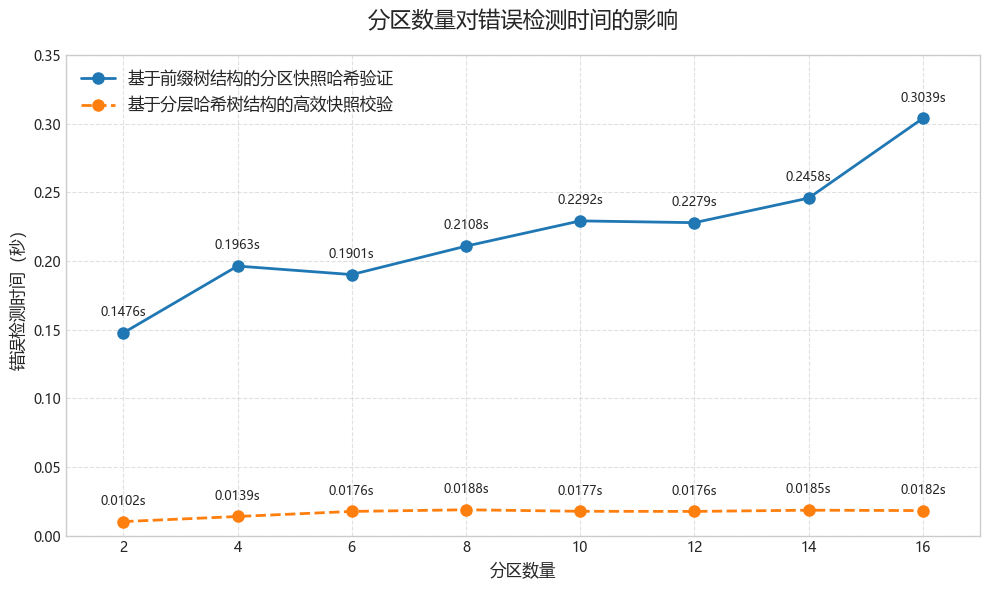

In [3]:
#分区数量对错误检测时间的影响
partition_counts = [2, 4, 6, 8, 10, 12, 14, 16]  # 横坐标：分区数量
time_method1 = [0.1476, 0.1963, 0.1901, 0.2108, 0.2292, 0.2279, 0.2458, 0.3039]  # BFS比较法
time_method2 = [0.0102, 0.0139, 0.0176, 0.0188, 0.0177, 0.0176, 0.0185, 0.0182]  # 分区哈希法

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制双折线图（保持原有样式不变）
line1, = plt.plot(partition_counts, time_method1, 
                 color='#1f77b4', marker='o', linestyle='-',
                 linewidth=2, markersize=8, label='基于前缀树结构的分区快照哈希验证')

line2, = plt.plot(partition_counts, time_method2, 
                 color='#ff7f0e', marker='o', linestyle='--',
                 linewidth=2, markersize=8, label='基于分层哈希树结构的高效快照校验')

# 添加标题和标签
plt.title('分区数量对错误检测时间的影响', fontsize=16, pad=20)
plt.xlabel('分区数量', fontsize=12)
plt.ylabel('错误检测时间（秒）', fontsize=12)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.6)

# 添加图例
plt.legend(fontsize=12, loc='upper left')

# 调整坐标轴范围 - 主要修改部分
plt.xlim(min(partition_counts)-1, max(partition_counts)+1)  # 横坐标范围调整为数据范围±1
plt.ylim(0, 0.35)  # 纵坐标固定上限为0.35秒

# 设置刻度
plt.xticks(np.arange(min(partition_counts), max(partition_counts)+2, 2))  # 横坐标每2个单位一个刻度
plt.yticks(np.arange(0, 0.36, 0.05))  # 纵坐标每0.05秒一个刻度

# 显示数据标签（调整位置避免重叠）
for x, y1, y2 in zip(partition_counts, time_method1, time_method2):
    plt.text(x, y1+0.01, f'{y1:.4f}s', ha='center', va='bottom', fontsize=9)
    plt.text(x, y2+0.01, f'{y2:.4f}s', ha='center', va='bottom', fontsize=9)

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('分区数量_错误检测时间.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

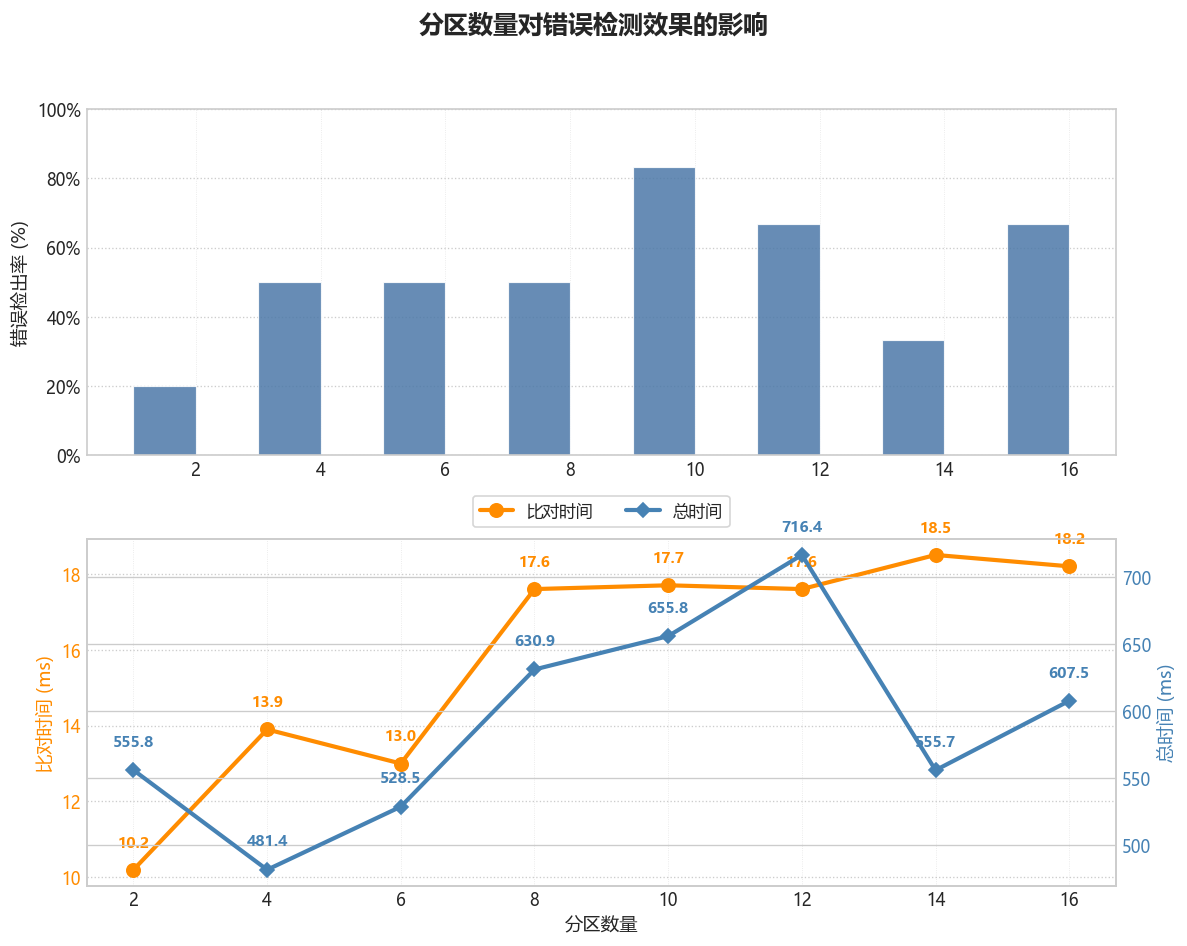

In [4]:
# 分区数量对错误检测效果的影响
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 设置全局样式
plt.style.use('seaborn-v0_8-whitegrid')  # 或使用'ggplot'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
partitions = np.array([2, 4, 6, 8, 10, 12, 14, 16])  # 分区数
detection_rates = np.array([20, 50, 50, 50, 83.33, 66.67, 33.33, 66.67])  # 错误检出率(%)
comparison_times = np.array([10.2, 13.9, 13.0, 17.6, 17.7, 17.6, 18.5, 18.2])  # 比对时间(ms)
total_times = np.array([555.8, 481.4, 528.5, 630.9, 655.8, 716.4, 555.7, 607.5])  # 总时间(ms)

# 创建画布和双轴（调整宽度比例为10x8）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), dpi=120)
fig.suptitle('分区数量对错误检测效果的影响', fontsize=15, fontweight='bold', y=0.98)

# ========== 错误检出率 - 柱状图 ==========
# 使用Tableau 10蓝色系
bar_color = '#4C78A8'
bars = ax1.bar(partitions - 0.5, detection_rates, width=1.0,
               color=bar_color, alpha=0.85, edgecolor='white', linewidth=0.7,
               label='错误检出率')

ax1.set_xticks(partitions)
ax1.set_ylabel('错误检出率 (%)', fontsize=11)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(PercentFormatter(100))

# 设置虚线网格（新增部分）
ax1.grid(axis='y', linestyle=':', color='gray', alpha=0.4, linewidth=0.8)
ax1.grid(axis='x', linestyle=':', color='gray', alpha=0.2, linewidth=0.5)

# 添加数据标签（白色文字更清晰）
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height+2,
             f'{height:.1f}%', ha='center', va='bottom', 
             fontsize=9, color='white', weight='bold')

# ========== 检测时间 - 折线图 ==========
# 使用对比鲜明的颜色
time_color = '#FF8C00'  # darkorange
total_color = '#4682B4'  # steelblue

# 比对时间（主坐标轴）
line1 = ax2.plot(partitions, comparison_times, color=time_color,
                marker='o', markersize=8, linewidth=2.5, 
                label='比对时间', zorder=3)

# 总时间（次坐标轴）
ax2_twin = ax2.twinx()
line2 = ax2_twin.plot(partitions, total_times, color=total_color,
                     marker='D', markersize=6, linewidth=2.5,
                     label='总时间', zorder=2)

# 坐标轴设置
ax2.set_xticks(partitions)
ax2.set_xlabel('分区数量', fontsize=11)
ax2.set_ylabel('比对时间 (ms)', fontsize=11, color=time_color)
ax2_twin.set_ylabel('总时间 (ms)', fontsize=11, color=total_color)

# 设置虚线网格（新增部分）
ax2.grid(axis='y', linestyle=':', color='gray', alpha=0.4, linewidth=0.8)
ax2.grid(axis='x', linestyle=':', color='gray', alpha=0.2, linewidth=0.5)

# 设置坐标轴颜色匹配曲线
ax2.tick_params(axis='y', colors=time_color)
ax2_twin.tick_params(axis='y', colors=total_color)

# 添加数据标签（比对时间）
for x, y in zip(partitions, comparison_times):
    ax2.text(x, y+0.5, f'{y:.1f}', ha='center', va='bottom', 
            fontsize=9, color=time_color, weight='bold')

# 添加数据标签（总时间）
for x, y in zip(partitions, total_times):
    ax2_twin.text(x, y+15, f'{y:.1f}', ha='center', va='bottom', 
                 fontsize=9, color=total_color, weight='bold')

# 合并图例（智能位置放置）
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper center', 
          bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=True)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 为标题留出空间

# 保存图像（透明背景更适合论文）
plt.savefig('detection_performance_optimized.png', dpi=300, 
            bbox_inches='tight', transparent=True)
plt.show()

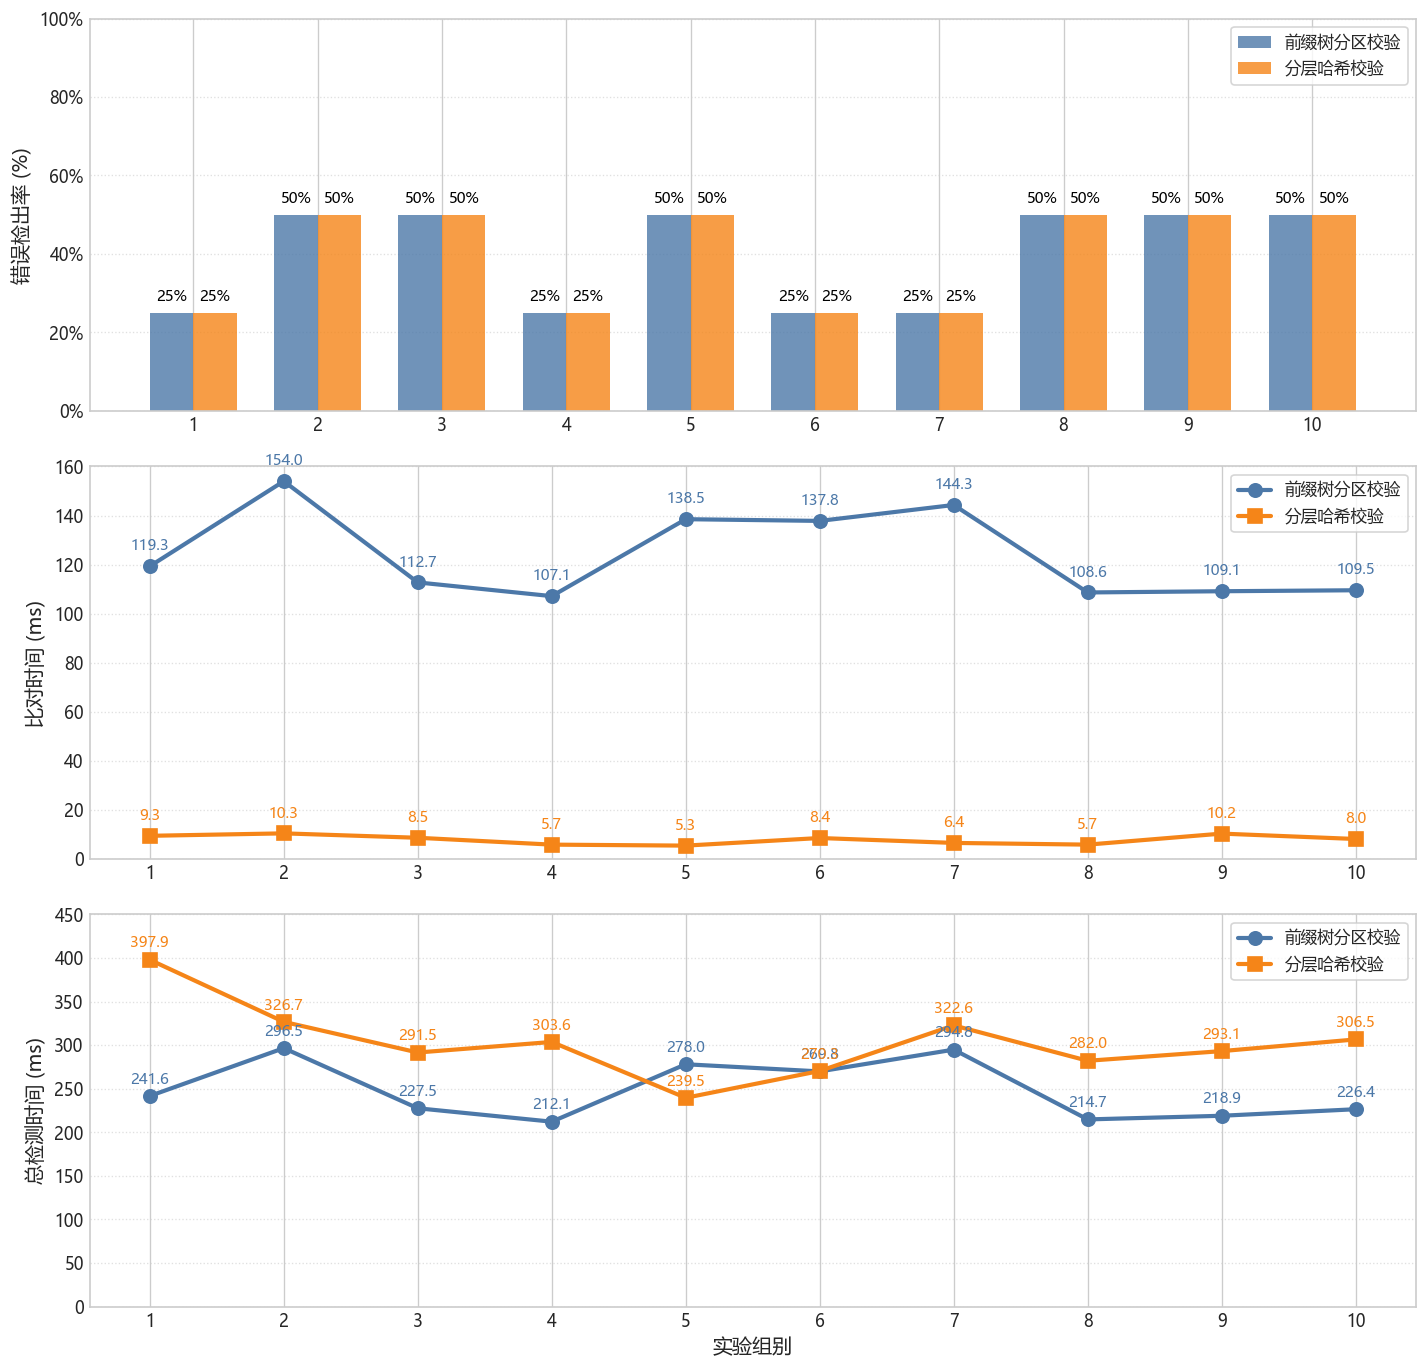

In [6]:
# 本文两种增量快照方法比较
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 设置全局样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
groups = np.arange(1, 11)  # 10组实验

# 基础版数据
basic_rates = [25, 50, 50, 25, 50, 25, 25, 50, 50, 50]
basic_compare_times = [119.3, 154.0, 112.7, 107.1, 138.5, 137.8, 144.3, 108.6, 109.1, 109.5]  # ms
basic_total_times = [241.6, 296.5, 227.5, 212.1, 278.0, 269.8, 294.8, 214.7, 218.9, 226.4]  # ms

# 升级版数据
improved_rates = [25, 50, 50, 25, 50, 25, 25, 50, 50, 50]
improved_compare_times = [9.3, 10.3, 8.5, 5.7, 5.3, 8.4, 6.4, 5.7, 10.2, 8.0]  # ms
improved_total_times = [397.9, 326.7, 291.5, 303.6, 239.5, 270.3, 322.6, 282.0, 293.1, 306.5]  # ms

# 创建画布
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12), dpi=120)
# fig.suptitle('基于前缀树结构的分区快照哈希验证', fontsize=16, fontweight='bold', y=0.98)

# ========== 错误检出率对比 ==========
# 使用渐变色
colors = ['#4C78A8', '#F58518']
width = 0.35

bars1 = ax1.bar(groups - width/2, basic_rates, width, 
               color=colors[0], alpha=0.8, label='前缀树分区校验')
bars2 = ax1.bar(groups + width/2, improved_rates, width, 
               color=colors[1], alpha=0.8, label='分层哈希校验')

ax1.set_xticks(groups)
ax1.set_ylabel('错误检出率 (%)', fontsize=12)
ax1.set_ylim(0, 100)
ax1.yaxis.set_major_formatter(PercentFormatter(100))
ax1.grid(axis='y', linestyle=':', alpha=0.6)

# 添加数据标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height+2,
                 f'{height:.0f}%', ha='center', va='bottom', 
                 fontsize=9, color='black')

# ========== 比对时间对比 ==========
line1, = ax2.plot(groups, basic_compare_times, color=colors[0],
                 marker='o', markersize=8, linewidth=2.5, label='前缀树分区校验')
line2, = ax2.plot(groups, improved_compare_times, color=colors[1],
                 marker='s', markersize=8, linewidth=2.5, label='分层哈希校验')

ax2.set_xticks(groups)
ax2.set_ylabel('比对时间 (ms)', fontsize=12)
ax2.set_ylim(0, 160)
ax2.grid(axis='y', linestyle=':', alpha=0.6)

# 添加数据标签
for x, y1, y2 in zip(groups, basic_compare_times, improved_compare_times):
    ax2.text(x, y1+5, f'{y1:.1f}', ha='center', va='bottom', 
            fontsize=9, color=colors[0])
    ax2.text(x, y2+5, f'{y2:.1f}', ha='center', va='bottom', 
            fontsize=9, color=colors[1])

# ========== 总时间对比 ==========
line3, = ax3.plot(groups, basic_total_times, color=colors[0],
                 marker='o', markersize=8, linewidth=2.5, label='前缀树分区校验')
line4, = ax3.plot(groups, improved_total_times, color=colors[1],
                 marker='s', markersize=8, linewidth=2.5, label='分层哈希校验')

ax3.set_xticks(groups)
ax3.set_xlabel('实验组别', fontsize=12)
ax3.set_ylabel('总检测时间 (ms)', fontsize=12)
ax3.set_ylim(0, 450)
ax3.grid(axis='y', linestyle=':', alpha=0.6)

# 添加数据标签
for x, y1, y2 in zip(groups, basic_total_times, improved_total_times):
    ax3.text(x, y1+10, f'{y1:.1f}', ha='center', va='bottom', 
            fontsize=9, color=colors[0])
    ax3.text(x, y2+10, f'{y2:.1f}', ha='center', va='bottom', 
            fontsize=9, color=colors[1])

# 合并图例
lines = [line1, line2]
ax1.legend(loc='upper right', frameon=True)
ax2.legend(loc='upper right', frameon=True)
ax3.legend(loc='upper right', frameon=True)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 保存图像
plt.savefig('method_comparison.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
# 三种错误检测方法比较
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 设置全局样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据准备
groups = np.arange(1, 11)  # 10组实验
methods = ['逐条比对', '分块比对', 'RIVA']

# 错误检出率 (%)
detection_rates = {
    '逐条比对': [100]*10,
    '分块比对': [100]*10,
    'RIVA': [14, 20, 20, 17, 17, 17, 14, 17, 20, 17]
}

# 总检测时间 (秒)
total_times = {
    '逐条比对': [2.8334, 2.1957, 1.4791, 2.2118, 1.9278, 1.9514, 2.4565, 2.0720, 1.7867, 1.9199],
    '分块比对': [2.9051, 2.1474, 1.4704, 2.2380, 2.1542, 2.1110, 2.5892, 2.2677, 1.8845, 1.9438],
    'RIVA': [3.2947, 2.8465, 2.5179, 3.1785, 2.9834, 3.0132, 4.0471, 3.6957, 2.7734, 2.9072]
}

# 创建画布和双轴
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), dpi=120)
# fig.suptitle('三种日志比对方法性能对比', fontsize=16, fontweight='bold', y=0.98)

# ========== 错误检出率对比 ==========
colors = ['#4C78A8', '#F58518', '#54A24B']  # 蓝,橙,绿
width = 0.25

# 为每种方法创建柱状图
for i, method in enumerate(methods):
    offset = width * (i - 1)  # 居中显示
    bars = ax1.bar(groups + offset, detection_rates[method], width, 
                  color=colors[i], alpha=0.8, label=method)
    
    # 添加数据标签（RIVA数据太小，单独处理）
    for x, y in zip(groups + offset, detection_rates[method]):
        if method == 'RIVA':
            ax1.text(x, y+0.5, f'{y:.2f}%', ha='center', va='bottom', 
                    fontsize=8, color='black')
        else:
            ax1.text(x, y+1, f'{y:.0f}%', ha='center', va='bottom', 
                    fontsize=9, color='black')

ax1.set_xticks(groups)
ax1.set_ylabel('错误检出率 (%)', fontsize=12)
ax1.set_ylim(0, 110)
ax1.yaxis.set_major_formatter(PercentFormatter(100))
ax1.grid(axis='y', linestyle=':', alpha=0.6)
ax1.legend(loc='upper right', frameon=True)

# ========== 总检测时间对比 ==========
markers = ['o', 's', 'D']  # 圆形,方形,菱形

for i, method in enumerate(methods):
    ax2.plot(groups, total_times[method], color=colors[i],
            marker=markers[i], markersize=8, linewidth=2, 
            label=method, zorder=3)
    
    # 添加数据标签
    for x, y in zip(groups, total_times[method]):
        ax2.text(x, y+0.1, f'{y:.2f}s', ha='center', va='bottom', 
                fontsize=9, color=colors[i])

ax2.set_xticks(groups)
ax2.set_xlabel('实验组别', fontsize=12)
ax2.set_ylabel('总检测时间 (秒)', fontsize=12)
ax2.set_ylim(0, 4.5)
ax2.grid(axis='y', linestyle=':', alpha=0.6)
ax2.legend(loc='upper right', frameon=True)

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.96])

# 保存图像
plt.savefig('log_comparison.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()